In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import mat73

import sys
sys.path.append('../src')
sys.path.append('../testcases')

from solvers import RealData
from helper_functions import get_hankel, get_hankel_svd
from default_params import params
from paths import ROOTPATH

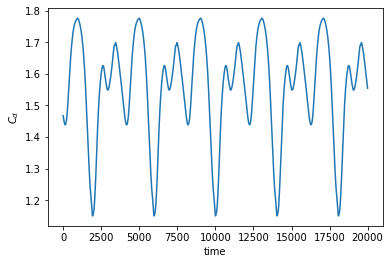

In [33]:
annots = loadmat('./small_files/NACA0012_Re1000_AoA35_2D_forces.mat')
cd = annots['CD'].flatten()
data = {
'dt': annots['dt'],
'x': [np.array(x) for x in cd],
}
fig = plt.figure()
plt.plot(cd[:int(len(cd)/3)])
plt.xlabel('time')
plt.ylabel('$C_d$')
plt.show()


In [4]:
## Read data
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
%matplotlib notebook

annots = loadmat(ROOTPATH+'data/small_files/NACA0012_Re1000_AoA35_2D_forces.mat')
cd = annots['CD'].flatten()
data = {
'dt': annots['dt'][0][0],
'time': [np.linspace(0, annots['dt'][0][0]*len(cd), len(cd), endpoint=False)],
'x': [cd]
}

params['dt'] = data['dt']
params['tend'] = data['time'][-1][-1]
params['n_ics'] = len(data['x'])



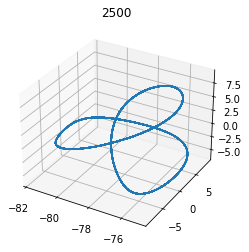

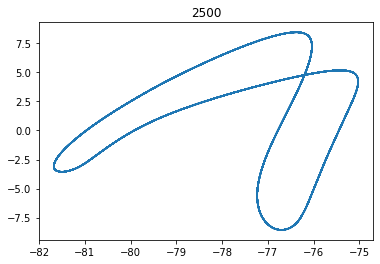

In [13]:
listid = [2500]
%matplotlib inline

for input_dim in listid:

    R = RealData(input_dim=input_dim)

    R.build_solution(data)
    u, s, vt, v_rec = get_hankel_svd(R.x, 3)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title(input_dim)
    ax.plot(v_rec[:, 0], v_rec[:, 1], v_rec[:, 2])

    fig = plt.figure()
    plt.title(input_dim)
    plt.plot(v_rec[:, 0], v_rec[:, 1])
    plt.show()



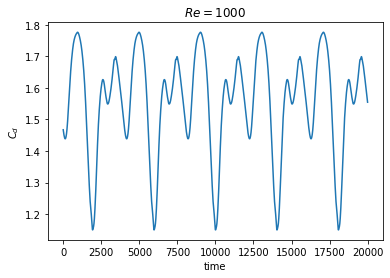

In [22]:
annots = loadmat('./local_data/flow_past_wing_adi/NACA0012_Re1000_AoA35_2D_forces.mat')
cd = annots['CD'].T[0]
fig = plt.figure()
plt.plot(cd[:int(len(cd)/3)])
plt.xlabel('time')
plt.ylabel('$C_d$')
plt.title('$Re = 1000$')
plt.show()
fig.savefig('re1000.pdf')

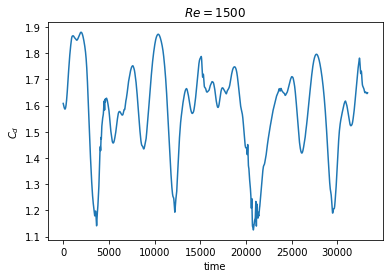

In [21]:
annots = loadmat('./local_data/flow_past_wing_adi/NACA0012_Re1500_AoA35_2D_forces.mat')
cd = annots['CD'].T[0]
fig = plt.figure()
plt.plot(cd[:int(len(cd)/3)])
plt.xlabel('time')
plt.ylabel('$C_d$')
plt.title('$Re = 1500$')
plt.show()
fig.savefig('re1500.pdf')

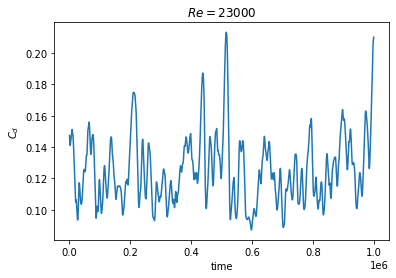

In [23]:
annots = loadmat('./local_data/flow_past_wing_adi/NACA0012_Re23000_AoA9_2D_forces.mat')
cd = annots['CD'].T[0]
fig = plt.figure()
plt.plot(cd[:int(len(cd)/3)])
plt.xlabel('time')
plt.ylabel('$C_d$')
plt.title('$Re = 23000$')
plt.show()
fig.savefig('re23000.pdf')

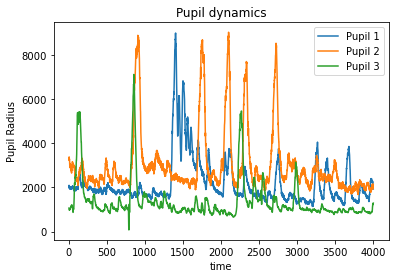

In [11]:

annots = mat73.loadmat('./local_data/pupils_156_joe.mat')
# cd = annots['CD'].T[0]
idxend = 6000
idx0 = 2000
fig = plt.figure()
plt.plot(annots['pupils'][idx0:idxend, 0])
plt.plot(annots['pupils'][idx0:idxend, 1])
plt.plot(annots['pupils'][idx0:idxend, 2])
plt.xlabel('time')
plt.ylabel('Pupil Radius')
plt.title('Pupil dynamics')
plt.legend(['Pupil 1', 'Pupil 2', 'Pupil 3'])
plt.show()
fig.savefig('pupils.pdf')